In [1]:
from datasets.datasets import SpanishData

This notebook demonstrates the analysis of the Spanish dataset with the binary target neckpain improvement.

The features comprise measures of demographic, socio-economic, pain, diagnostic and therapeutic factors. For instance, the features age (demographic), employment status (socio-economic), chronicity (pain), magnet resonance tomography diagnostics (diagnostic) and treatment with steroids (therapeutic) are included in the dataset.

We use ICE and PD plots to analyze the effect of the feature disability at baseline (scale from 0 to 100) on TabPFN's predictions. Beofre doing so, we check the performance of TabPFN on this dataset.

In [2]:
from tabpfniml import ICE_PD

icepd_sp = ICE_PD(data=SpanishData(id=1),
                  n_train=512,
                  n_test=256)

icepd_sp.check_performance()

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


Score
ROC AUC                     0.772
Accuracy                    0.789
Balanced accuracy           0.630
F1-score                    0.871
Precision                   0.802
Recall                      0.953
ECE                         0.078
MCE                         0.399
Prediction time in seconds  2.455

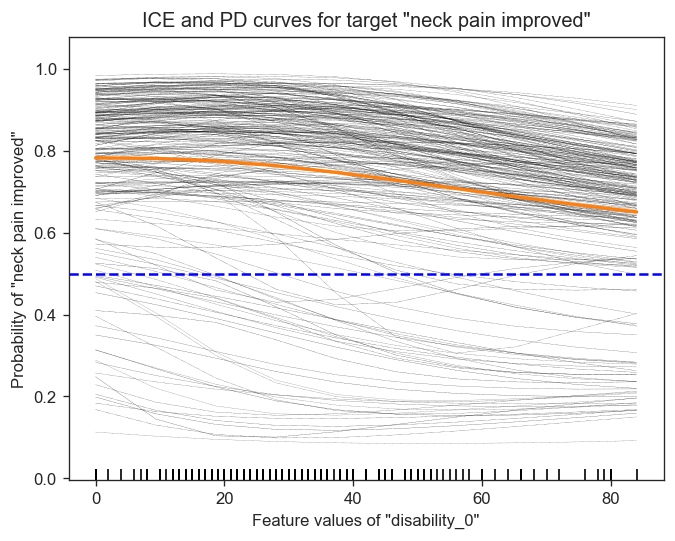

In [3]:
icepd_sp.fit(features=["disability_0"],
             max_levels_per_feature=10)

icepd_sp.plot(["disability_0"])

In [4]:
from tabpfniml import ALE

ale_sp = ALE(data=SpanishData(id=1))

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [5]:
ale_sp.fit(features=["disability_0"],
        max_intervals_per_feature=10,
        discretize_by_linear_spacing=False,
        center=True)

ale_sp.get_ALE(feature="disability_0")


Interval Bounds    ALE
0   (0.000,13.000)  0.038
1  (13.000,18.000)  0.029
2  (18.000,23.000)  0.023
3  (23.000,26.000)  0.018
4  (26.000,30.000)  0.013
5  (30.000,37.000)  0.001
6  (37.000,44.000) -0.012
7  (44.000,53.000) -0.032
8  (53.000,88.000) -0.124

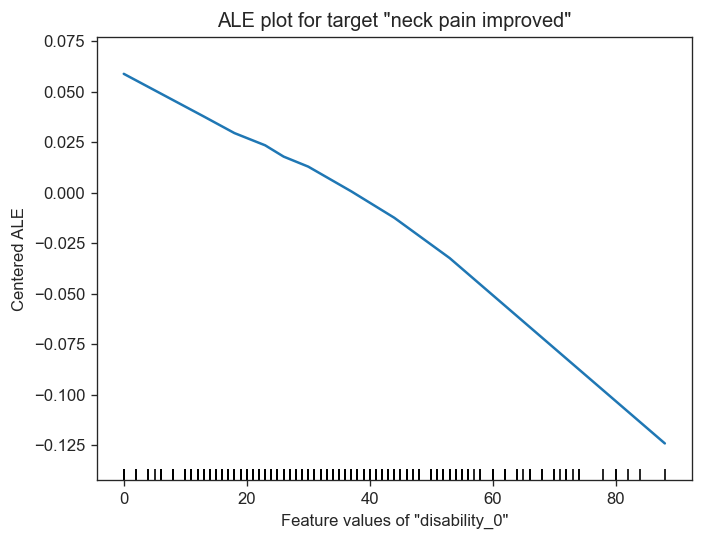

In [6]:
ale_sp.plot(["disability_0"])

Both PD plot and ALE indicate a negative effect of neck-related disability at baseline on neckpain improvement.
The ICE plot uncovers considerable effect heterogeneity, as can be seen by some curves having a much steeper slope than others.

In [7]:
%%capture
from tabpfniml import SHAP

shap_sp = SHAP(data=SpanishData(id=1),
               n_train=256,
               n_test=128)

shap_sp.fit(pred_based=True, 
         loss_based=True,
         K=64)

/opt/homebrew/Caskroom/miniforge/base/envs/tabpfn_test/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


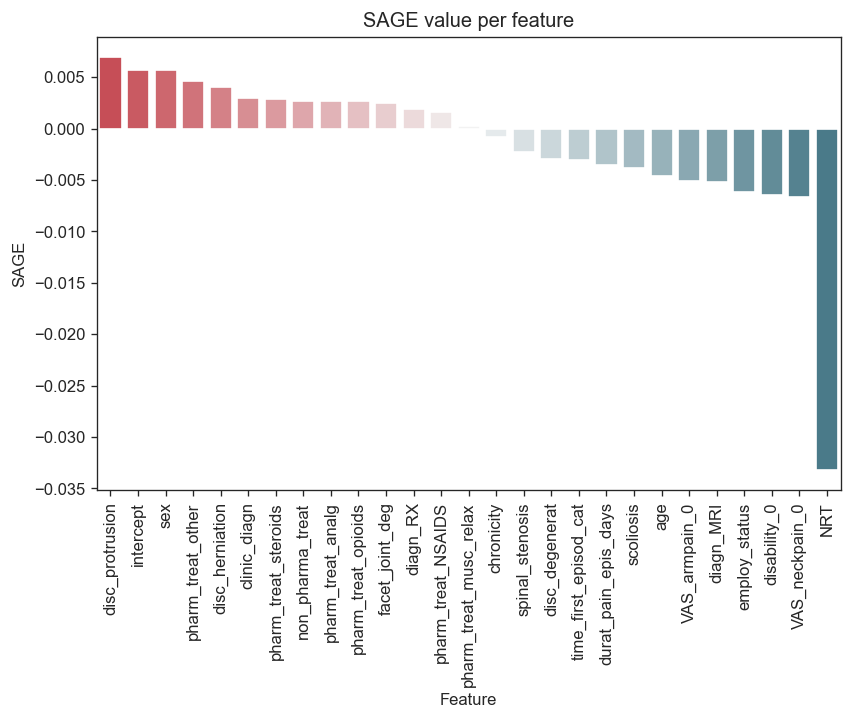

In [8]:
shap_sp.plot_bar(loss_based=True)

Thus, the Neuro-reflexotherapy seems to have the largest impact in the predictive performance. Thus, let's check out the ICE boxplot for NRT.

In [9]:
%%capture
icepd_sp.fit(["NRT"])

icepd_sp.plot(["NRT"])

Thus, there seems to be a strong positive effect of receiving NRT on the predicted probability of recovery. Furthermore, let's check out the the ALE of age.

ALE has already been fitted for features ['disability_0'].


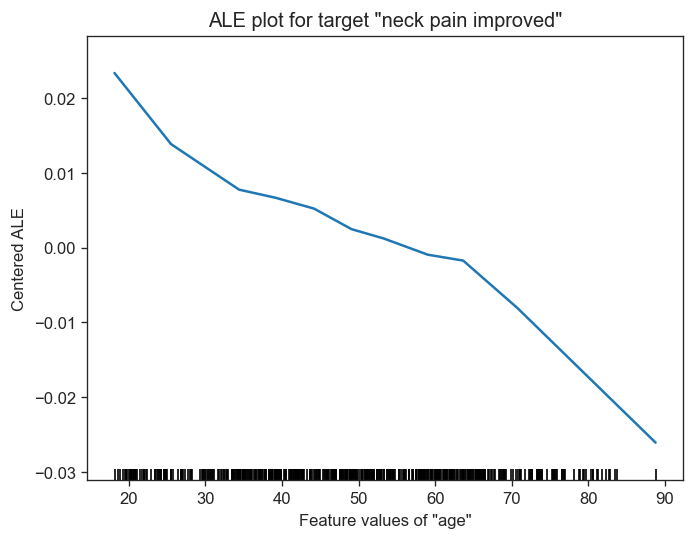

In [10]:
ale_sp.fit(["age"])

ale_sp.plot(["age"])

Hence, there seems to be a negative effect of increasing age on the predicted probability of recovery.

Now, let's check out the Kernel SHAP package, which allows for more plot options.

In [11]:
%%capture
from tabpfniml import SHAP_Package_Wrapper

shap_package= SHAP_Package_Wrapper(data=SpanishData(id=1), n_train=256, n_test=128)

shap_package.fit(K= 64, approximate_marginalization= True, log_odds_units= True)


The beeplot of all individual SHAP values is shown below.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.


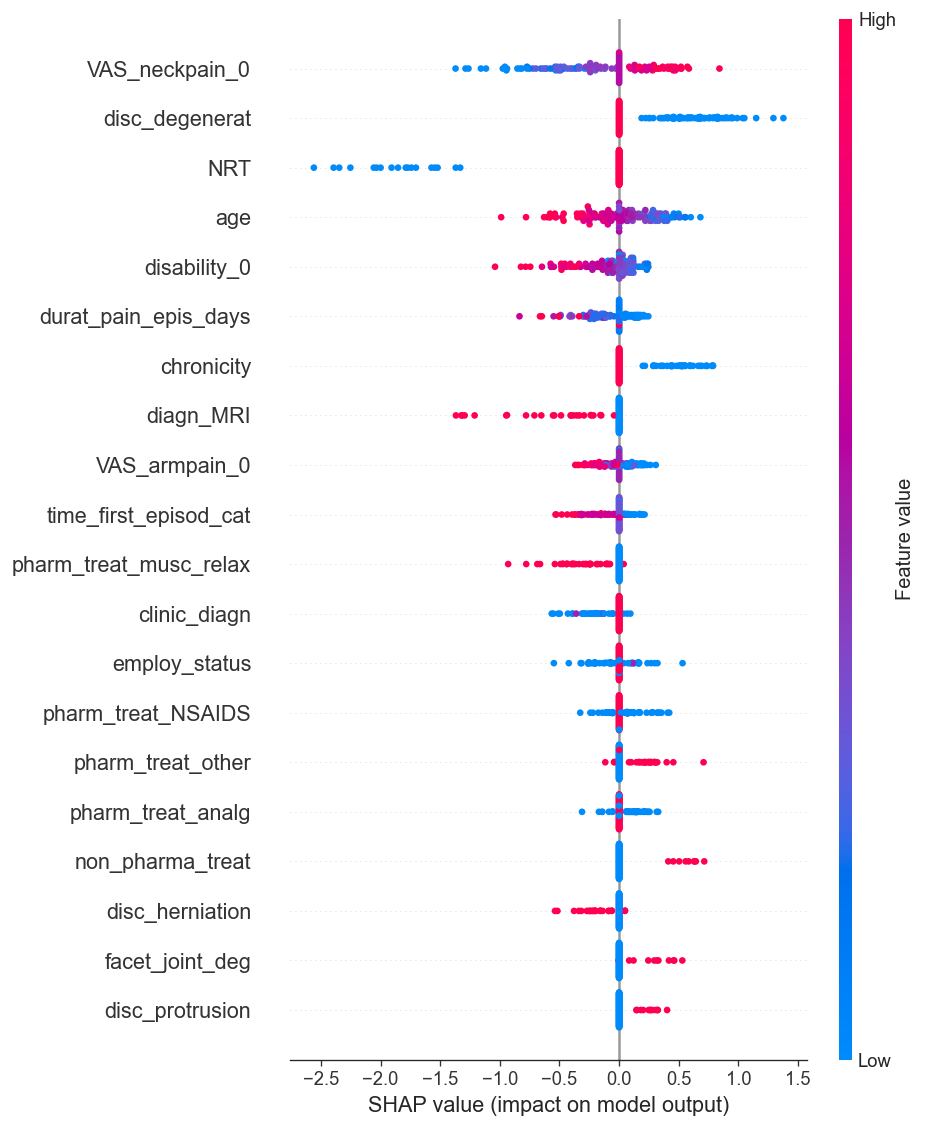

In [12]:
shap_package.plot_summary()

We can conclude that if the disc was not degenerated, the predicted probability of recovery increases. Furthermore, the plot is coherent with the previous plots, since higher age and higher initial neck-related disability score is associated with negative SHAP values.